In [24]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)

In [25]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/israel_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Country/Region', 'Lat', 'Long', '2001/1/21', '2001/2/21', '2001/3/21',
       '2001/4/21', '2001/5/21', '2001/6/21', '2001/7/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=102)

In [26]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Country/Region','Lat','Long'],axis=1)

In [27]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

       0       1       2       3       4       5       6       7       8   \
0  428510  434799  441542  448173  456139  463448  471048  477357  485434   

       9   ...      89      90      91      92      93      94      95  \
0  491319  ...  833105  833456  833707  834070  834247  834603  834920   

       96      97      98  
0  835216  835486  835674  

[1 rows x 99 columns]


In [28]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    

print(ay.shape)
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/israel_deffirence.csv',index_col=None,names=range(1,100))
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/israel_deffirence.csv", ay, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/israel_deffirence.csv',index_col=None)

(99, 1)


In [29]:
print(traindata)
traindata.shape

    6.289000000000000000e+03
0                     6743.0
1                     6631.0
2                     7966.0
3                     7309.0
4                     7600.0
..                       ...
93                     317.0
94                     296.0
95                     270.0
96                     188.0
97                       0.0

[98 rows x 1 columns]


(98, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(x_data)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[ 6743.],
        [ 6631.],
        [ 7966.],
        [ 7309.],
        [ 7600.],
        [ 6309.],
        [ 8077.],
        [ 5885.],
        [ 9754.],
        [ 8990.],
        [ 9997.],
        [ 9754.],
        [ 5235.],
        [ 8450.],
        [ 8190.],
        [ 6560.],
        [ 7380.],
        [10213.],
        [ 7027.],
        [ 6159.],
        [ 4933.],
        [ 3442.],
        [ 3666.],
        [ 8587.],
        [11934.],
        [ 7305.],
        [ 5096.],
        [ 4798.],
        [ 4646.],
        [ 8811.],
        [ 7732.],
        [ 8896.],
        [ 6744.],
        [ 5238.],
        [ 4727.],
        [ 6518.],
        [ 4427.],
        [ 7191.],
        [ 6010.],
        [ 5083.],
        [ 3934.],
        [ 3100.],
        [ 2534.],
        [ 5913.],
        [ 4282.],
        [ 4054.],
        [ 3305.],
        [ 2579.],
        [    0.],
        [ 5530.],
        [ 4955.],
        [ 4574.],
        [ 4184.],
        [ 3970.],
        [ 3054.],
        [ 

In [31]:
print(y_data.shape)

(48, 1)


In [32]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 10, 50)            7950      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 2s 346ms/step - loss: 0.0871 - mae: 0.2283 - val_loss: 0.0802 - val_mae: 0.2521
Epoch 2/600
5/5 [==============================] - 0s 53ms/step - loss: 0.0536 - mae: 0.1832 - val_loss: 0.0980 - val_mae: 0.2845
Epoch 3/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0453 - mae: 0.1628 - val_loss: 0.0960 - val_mae: 0.2814
Epoch 4/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0453 - mae: 0.1668 - val_loss: 0.1073 - val_mae: 0.2995
Epoch 5/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0493 - mae: 0.1788 - val_loss: 0.1515 - val_mae: 0.3659
Epoch 6/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0424 - mae: 0.1617 - val_loss: 0.0781 - val_mae: 0.2520
Epoch 7/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0411 - mae: 0.1612 - val_loss: 0.1002 - val_mae: 0.2891
Epoch 8/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0448 - mae: 0.1

5/5 [==============================] - 0s 22ms/step - loss: 0.0280 - mae: 0.1339 - val_loss: 0.1281 - val_mae: 0.3342
Epoch 64/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0311 - mae: 0.1395 - val_loss: 0.0671 - val_mae: 0.2366
Epoch 65/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0343 - mae: 0.1462 - val_loss: 0.1071 - val_mae: 0.3004
Epoch 66/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0285 - mae: 0.1346 - val_loss: 0.1103 - val_mae: 0.3053
Epoch 67/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0289 - mae: 0.1374 - val_loss: 0.1218 - val_mae: 0.3239
Epoch 68/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0280 - mae: 0.1346 - val_loss: 0.1453 - val_mae: 0.3593
Epoch 69/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0334 - mae: 0.1433 - val_loss: 0.1001 - val_mae: 0.2892
Epoch 70/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0278 - mae: 0.1314 - 

5/5 [==============================] - 0s 19ms/step - loss: 0.0264 - mae: 0.1305 - val_loss: 0.0933 - val_mae: 0.2779
Epoch 126/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0261 - mae: 0.1336 - val_loss: 0.1073 - val_mae: 0.3008
Epoch 127/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0368 - mae: 0.1513 - val_loss: 0.0960 - val_mae: 0.2820
Epoch 128/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0262 - mae: 0.1281 - val_loss: 0.1043 - val_mae: 0.2951
Epoch 129/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0280 - mae: 0.1344 - val_loss: 0.1171 - val_mae: 0.3175
Epoch 130/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0272 - mae: 0.1287 - val_loss: 0.0960 - val_mae: 0.2816
Epoch 131/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0268 - mae: 0.1339 - val_loss: 0.1058 - val_mae: 0.2981
Epoch 132/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0293 - mae: 0.

5/5 [==============================] - 0s 22ms/step - loss: 0.0237 - mae: 0.1194 - val_loss: 0.0866 - val_mae: 0.2604
Epoch 188/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0238 - mae: 0.1201 - val_loss: 0.0949 - val_mae: 0.2773
Epoch 189/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0199 - mae: 0.1072 - val_loss: 0.1073 - val_mae: 0.3003
Epoch 190/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0230 - mae: 0.1115 - val_loss: 0.0454 - val_mae: 0.1789
Epoch 191/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0268 - mae: 0.1356 - val_loss: 0.0885 - val_mae: 0.2671
Epoch 192/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0224 - mae: 0.1175 - val_loss: 0.0907 - val_mae: 0.2710
Epoch 193/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0227 - mae: 0.1140 - val_loss: 0.0628 - val_mae: 0.2161
Epoch 194/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0246 - mae: 0.

5/5 [==============================] - 0s 23ms/step - loss: 0.0255 - mae: 0.1231 - val_loss: 0.0806 - val_mae: 0.2433
Epoch 250/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0224 - mae: 0.1175 - val_loss: 0.0921 - val_mae: 0.2668
Epoch 251/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0210 - mae: 0.1090 - val_loss: 0.0774 - val_mae: 0.2345
Epoch 252/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0212 - mae: 0.1161 - val_loss: 0.1248 - val_mae: 0.3239
Epoch 253/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0238 - mae: 0.1175 - val_loss: 0.0789 - val_mae: 0.2403
Epoch 254/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0234 - mae: 0.1218 - val_loss: 0.1155 - val_mae: 0.3098
Epoch 255/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0208 - mae: 0.1082 - val_loss: 0.1237 - val_mae: 0.3230
Epoch 256/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0226 - mae: 0.

5/5 [==============================] - 0s 23ms/step - loss: 0.0233 - mae: 0.1162 - val_loss: 0.0723 - val_mae: 0.2225
Epoch 312/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0185 - mae: 0.1041 - val_loss: 0.0908 - val_mae: 0.2562
Epoch 313/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0199 - mae: 0.1068 - val_loss: 0.0882 - val_mae: 0.2501
Epoch 314/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0178 - mae: 0.1026 - val_loss: 0.1065 - val_mae: 0.2795
Epoch 315/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0221 - mae: 0.1106 - val_loss: 0.0695 - val_mae: 0.2168
Epoch 316/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0166 - mae: 0.0999 - val_loss: 0.0675 - val_mae: 0.2116
Epoch 317/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0224 - mae: 0.1054 - val_loss: 0.0693 - val_mae: 0.2134
Epoch 318/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0225 - mae: 0.

5/5 [==============================] - 0s 24ms/step - loss: 0.0173 - mae: 0.1014 - val_loss: 0.1084 - val_mae: 0.2821
Epoch 374/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0195 - mae: 0.1067 - val_loss: 0.0849 - val_mae: 0.2407
Epoch 375/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0143 - mae: 0.0915 - val_loss: 0.0902 - val_mae: 0.2535
Epoch 376/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0189 - mae: 0.1019 - val_loss: 0.1108 - val_mae: 0.2856
Epoch 377/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0159 - mae: 0.0952 - val_loss: 0.0879 - val_mae: 0.2482
Epoch 378/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0196 - mae: 0.1083 - val_loss: 0.1075 - val_mae: 0.2788
Epoch 379/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0176 - mae: 0.1038 - val_loss: 0.0766 - val_mae: 0.2293
Epoch 380/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0156 - mae: 0.

5/5 [==============================] - 0s 25ms/step - loss: 0.0171 - mae: 0.1010 - val_loss: 0.0806 - val_mae: 0.2420
Epoch 436/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0189 - mae: 0.1101 - val_loss: 0.0761 - val_mae: 0.2225
Epoch 437/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0160 - mae: 0.0952 - val_loss: 0.0855 - val_mae: 0.2412
Epoch 438/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0198 - mae: 0.1084 - val_loss: 0.0779 - val_mae: 0.2363
Epoch 439/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0177 - mae: 0.1028 - val_loss: 0.0852 - val_mae: 0.2383
Epoch 440/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0164 - mae: 0.0934 - val_loss: 0.0844 - val_mae: 0.2382
Epoch 441/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0167 - mae: 0.0967 - val_loss: 0.0729 - val_mae: 0.2285
Epoch 442/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0164 - mae: 0.

5/5 [==============================] - 0s 27ms/step - loss: 0.0119 - mae: 0.0868 - val_loss: 0.0823 - val_mae: 0.2352
Epoch 498/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0129 - mae: 0.0914 - val_loss: 0.0825 - val_mae: 0.2317
Epoch 499/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0193 - mae: 0.1053 - val_loss: 0.0990 - val_mae: 0.2550
Epoch 500/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0140 - mae: 0.0906 - val_loss: 0.0913 - val_mae: 0.2426
Epoch 501/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0142 - mae: 0.0922 - val_loss: 0.0931 - val_mae: 0.2450
Epoch 502/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0144 - mae: 0.0931 - val_loss: 0.0766 - val_mae: 0.2273
Epoch 503/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0163 - mae: 0.0953 - val_loss: 0.0903 - val_mae: 0.2402
Epoch 504/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0149 - mae: 0.

5/5 [==============================] - 0s 26ms/step - loss: 0.0110 - mae: 0.0801 - val_loss: 0.0717 - val_mae: 0.2178
Epoch 560/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0159 - mae: 0.0998 - val_loss: 0.0803 - val_mae: 0.2261
Epoch 561/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0141 - mae: 0.0912 - val_loss: 0.0850 - val_mae: 0.2280
Epoch 562/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0139 - mae: 0.0950 - val_loss: 0.0785 - val_mae: 0.2218
Epoch 563/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0131 - mae: 0.0896 - val_loss: 0.0656 - val_mae: 0.2081
Epoch 564/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0149 - mae: 0.0908 - val_loss: 0.1050 - val_mae: 0.2586
Epoch 565/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0156 - mae: 0.0978 - val_loss: 0.1017 - val_mae: 0.2627
Epoch 566/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0128 - mae: 0.

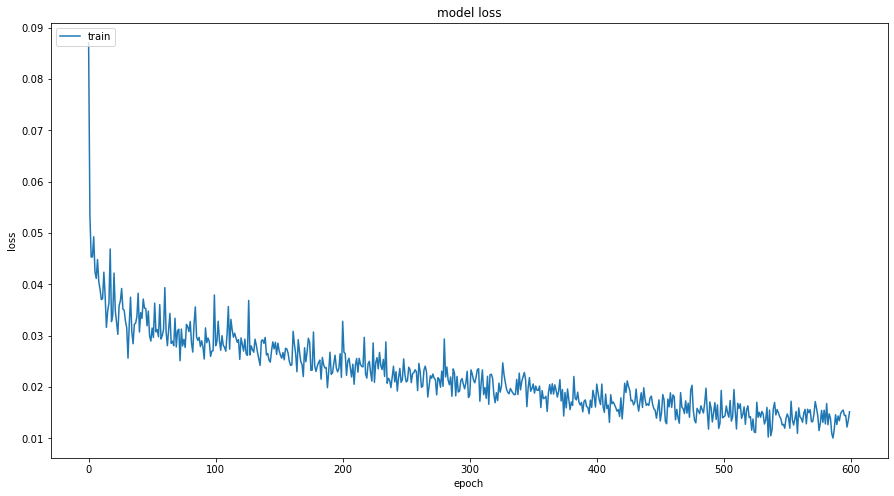

In [33]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [34]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 999us/step - loss: 0.0278 - mae: 0.1293
score is: test_loss 0.027817, mae 0.129285


In [35]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



0.74012035
0.39815506
0.1975523
0.18833026
0.18004274
0.25685412
0.20760295
0.18258505
0.15381213
0.11343358
The predicted perday spread from  2004/3/21 is
[[734.1994 ]
 [394.96982]
 [195.97188]
 [186.82362]
 [178.6024 ]
 [254.79929]
 [205.94212]
 [181.12436]
 [152.58163]
 [112.52611]]


In [36]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(actual)


[[351.]
 [251.]
 [363.]
 [177.]
 [356.]
 [317.]
 [296.]
 [270.]
 [188.]
 [  0.]]


MSE = 0.02802060035974753
R-Squared Score = -5.350508353233351


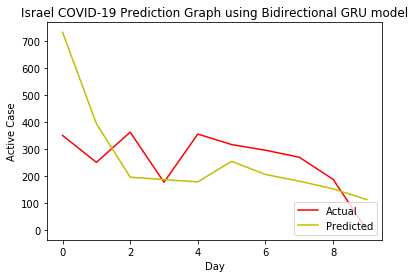

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('Israel COVID-19 Prediction Graph using Bidirectional GRU model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)